In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [2]:
import numpy as np 
import pandas as pd 
from pandas.plotting import register_matplotlib_converters
import math
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
filepath = "C:/Users/User/mc/Project_Assignment_2020/2 - Python_code_for_Logistic_Regression/Data/"

In [4]:
train_df = pd.read_csv(filepath + 'Training delimaEX.csv')
train_df.head()

,AccounWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,66,1,0,0.00,4,154.0,133,44.0,9.95,9.5,1
1,43,0,0,0.00,0,251.5,105,61.0,10.64,9.3,0
2,37,1,0,0.00,3,191.4,116,47.0,8.37,14.0,0
3,148,1,1,3.32,1,252.9,129,101.2,14.22,12.3,0
4,87,1,1,2.57,3,82.6,113,59.7,11.22,9.5,0


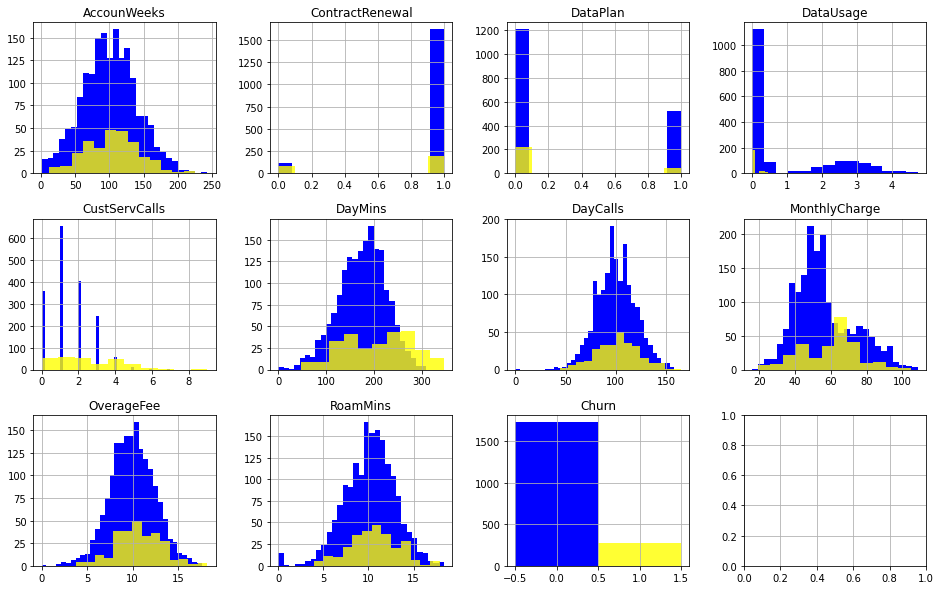

In [10]:
# Create histograms for feature columns separated by prediction label value
register_matplotlib_converters()
nrows = 3; ncols = int(round(train_df.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(16, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
columns = train_df.columns
f = 0
features = []
for i in range(nrows):
    for j in range(ncols):
        if f <= train_df.shape[1]-1:
            assetname = columns[f]
            y0 = train_df[train_df['Churn']==0][assetname]
            ax[i, j].hist(y0, color='blue', label=assetname + '-Churn', bins='auto')
            y1 = train_df[train_df['Churn']==1][assetname]
            ax[i, j].hist(y1, color='yellow', alpha=0.8, label=assetname + '-NoChurn', bins='auto')
            f += 1
            ax[i, j].set_title(assetname)
            features.append(assetname)
            ax[i, j].grid()
plt.grid()                        
plt.show()
